In [1]:
# to read .pkl files
import pickle

# to create and manipulate dataframe
import pandas as pd

# for Scientific and vector computation
import numpy as np

#to plot (visualize) the data
from matplotlib import pyplot as plt

from scipy import optimize

import random

<p> Reading the file train_image.pkl and train_label.pkl. <br/>
    And storing the result in a dataframe 'data' </p>

In [2]:
with open('train_image.pkl','rb') as f:
    data = pd.DataFrame(pickle.load(f))
with open('train_label.pkl','rb') as fp:
    df = pd.DataFrame(pickle.load(fp))
data = pd.concat([data,df],axis=1)
num = [p for p in range(8000)]
random.shuffle(num)
#print(num)
data_array = np.zeros((8000,785))
X = data.iloc[num,:].values
#display(data)

display(data)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,0
0,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,11,142,200,...,110,158,18,0,3,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,80,46,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,58,121,...,23,30,37,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,42,...,32,19,23,13,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,39,90,...,149,186,0,0,2,0,0,0,0,0
8,0,0,0,0,0,0,0,73,143,149,...,57,119,97,7,0,0,0,0,0,0
9,0,0,0,0,0,0,0,96,155,0,...,197,234,101,0,0,0,0,0,0,0


<p> Since there are 784 columns, so the image will be <strong>28 X 28</strong> grid.<br/> The cell given below tries to visualize the data to gain more understanding of it </p>

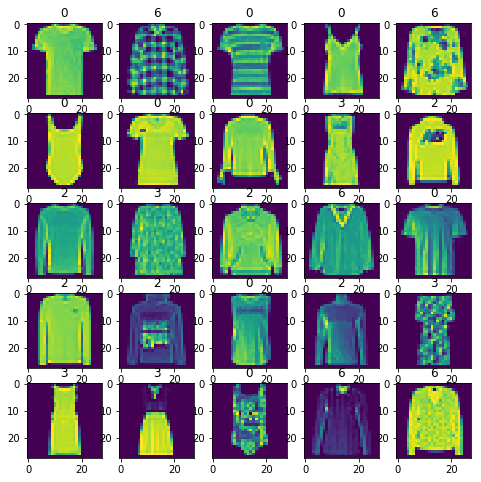

In [3]:
m = 28

# x stores the pixel density of one complete 28 X 28 grid
x = np.zeros((m,m))

# creating 25 subplots from the info in dataset given  
fig, ax = plt.subplots(5, 5, figsize=(8, 8))
for a,k in zip(ax.flat,range(25)):
    for i in range(0,756,28):
        j = int(i/28)
        x[j,:] = X[k,i:i+28]
    a.imshow(x)
    a.set_title(X[k,784])

In [4]:
labels = np.unique(X[:,784])
print(labels)
X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)

[0 2 3 6]


<p>Creating :
    <ol>
        <li>Training set : X_train,Y_train (60 % of data provided i.e contains 4800 rows)</li>
        <li>Test set : X_test, Y_test (20 % i.e. 1600 rows)</li>
        <li>Validation set : X_val, Y_val (20% i.e. 1600 rows)</li>
    </ol>
    Here X and Y contains the data for images and their label respectively. We're creating different sets so as to select good regularization parameter and check the accuracy/precision of our algorithm.
</p>

In [5]:
#X_train = np.zeros((4800,785))
Y_train = np.zeros(4800)
X_train = X[:4800,:-1]
Y_train = X[:4800,785]
X_val = X[4800:6400,:-1]
Y_val = X[4800:6400,785]
X_test = X[6400:,:-1]
Y_test = X[6400:,785]

In [6]:
def sigmoid(z):
    sig = np.exp(-z)
    sig = 1  + sig
    sig = 1/sig
    return sig

In [7]:
def lrCostFunction(theta,X,Y,lambda_):
    if Y.dtype == bool:
        Y = Y.astype(int)
    m = Y.size
    J = -1/m * np.sum(Y*np.log(sigmoid(np.dot(X,theta))) + (1-Y)*np.log(1-sigmoid(np.dot(X,theta))))
    J = J + lambda_/(2*m) * np.sum(theta[1:]**2)
    grad = np.dot(X.T,sigmoid(np.dot(X,theta))-Y)
    grad[1:] = grad[1:] + (lambda_/m)*theta[1:]
    return J,grad

In [8]:
def calcTheta(X,Y,initial_theta,lambda_,labels):
    options = {'maxiter':50}
    all_theta = np.zeros((len(labels),X.shape[1]))
    for (c,j) in zip(labels,range(len(labels))) :
        res = optimize.minimize(lrCostFunction,initial_theta,(X,(Y==c),lambda_),jac=True,method='TNC',options=options)
        all_theta[j:] = res.x
    return all_theta

In [14]:
n = X_train.shape[1]
m = len(labels)
print(X_train.shape)
initial_theta = np.zeros((n,1))
print(initial_theta.shape)
print(Y_train.shape)
lambda_ = 0.1
all_theta = calcTheta(X_train,Y_train,initial_theta,lambda_,labels)
print(all_theta)

(4800, 785)
(785, 1)
(4800,)


/home/deepti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/deepti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


[[-1.00724116e-06  2.33043599e-08  2.53089015e-08 ... -1.04036024e-05
  -2.31821168e-06 -1.79107964e-07]
 [-1.46458473e-06 -1.51435579e-08  1.44512657e-08 ...  1.58845447e-05
   2.41819019e-06  3.67032834e-07]
 [-6.56375152e-07 -1.05266172e-08 -2.36738620e-08 ...  2.18124721e-07
  -1.71572633e-07 -6.73854521e-08]
 [-2.74391636e-06 -1.89767311e-08 -1.94813362e-07 ... -2.80897195e-05
  -4.75960627e-06 -1.15388229e-06]]


In [10]:
def predict(X,all_theta,labels):
    idx = np.argmax(np.dot(X,all_theta.T),axis=1)
    return labels[idx]

In [11]:
y_test_calc = predict(X_test,all_theta,labels)
y_val_calc = predict(X_val,all_theta,labels)
y_train_calc = predict(X_train,all_theta,labels)

In [12]:
def build_confusion_matrix(Y_test_calc,Y_test,labels):
    k= len(labels)
    confusion_matrix = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            confusion_matrix[i][j] = np.sum((Y_test == labels[i]) & (Y_test_calc == labels[j]))
    conf_mat_df = pd.DataFrame(confusion_matrix)
    display(conf_mat_df)
    #for line in confusion_matrix:
     #   print(*line)
    return confusion_matrix

In [13]:
print(Y_test.shape)
confusion_matrix = build_confusion_matrix(y_test_calc,Y_test,labels)
confusion_matrix_val = build_confusion_matrix(y_val_calc,Y_val,labels)
confusion_matrix_train = build_confusion_matrix(y_train_calc,Y_train,labels)

(1600,)


,0,1,2,3
0,315.0,12.0,44.0,20.0
1,13.0,343.0,3.0,49.0
2,17.0,7.0,357.0,18.0
3,99.0,68.0,24.0,211.0


,0,1,2,3
0,322.0,6.0,46.0,33.0
1,18.0,310.0,4.0,39.0
2,20.0,3.0,359.0,18.0
3,112.0,73.0,28.0,209.0


,0,1,2,3
0,975.0,19.0,142.0,66.0
1,39.0,1046.0,16.0,120.0
2,53.0,23.0,1088.0,37.0
3,278.0,236.0,66.0,596.0


In [15]:
def calculate_recall_precision(confusion_matrix):
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix,axis=0)
    recall = np.diag(confusion_matrix)/np.sum(confusion_matrix,axis=1)
    return np.mean(precision),np.mean(recall)

In [17]:
precision,recall = calculate_recall_precision(confusion_matrix)
print("precision is : "% precision)
print("recall is : "% recall)

precision is : 
recall is : 
